# Import Modules

In [1]:
%autosave 30
import cv2
# import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import time

Autosaving every 30 seconds


# cv2_imshow for desktop

In [2]:
"""Colab-specific patches for functions."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

__all__ = ['cv2_imshow', 'cv_imshow']

import cv2
from IPython import display
import PIL


def cv2_imshow(a):

    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display.display(PIL.Image.fromarray(a))


cv_imshow = cv2_imshow

# Import images

In [3]:
start_time = time.time()

img_dir = "dataset/cifar10" 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
images = []
for f1 in files:
    img = cv2.imread(f1)
    images.append(img)

end_time = time.time()
read_time = end_time - start_time
print("Read images time: ", read_time)

Read images time:  0.20599842071533203


# Pixel by pixel Calculation

In [4]:
start_time = time.time()
random_image = [np.random.randint(low=0, high=(len(images)-1)) for i in range(10)]
arr = [[] for i in range(10)]

count = 0
for img in images:
    sum_manhattan = np.zeros(10, dtype='int64')
    sum_euclidean = np.zeros(10, dtype='int64')
    for i in range(len(img)):
        for j in range(len(img)):
            for k in range(3):
                for l in range (10):
                    img_select = images[random_image[l]]
                    sum_manhattan[l] += np.abs(img_select[i][j][k] - img[i][j][k])
                    sum_euclidean[l] += (img_select[i][j][k] - img[i][j][k])**2

    for i in range(10):
        arr[i].append(np.array([count, sum_manhattan[i], np.sqrt(sum_euclidean[i]), img]))
    
    count += 1

end_time = time.time()

cal_time = end_time - start_time
print("Calculation images time: ", cal_time)
# print(arr[1][:2])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


Calculation images time:  239.11748242378235


# Manhattan Distance

In [5]:
def print_manhattan(arr):
    images_matrix = np.array(arr)
    images_sort = images_matrix[images_matrix[:,1].argsort()]
    print("=================== Random Image ==================")
    cv2_imshow(images_sort[0][3])
    print("========= Most Similar Images with values =========")
    for i in range(1,10):
        view_image = images_sort[i][3]
        similarity = images_sort[i][1]
        cv2_imshow(view_image)
        print(similarity)

=================== Random Image ==================


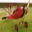

========= Most Similar Images with values =========


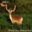

293571


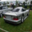

300381


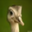

309324


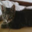

311216


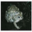

321056


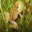

324563


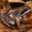

325763


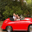

327759


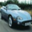

328482


In [6]:
print_manhattan(arr[0])

=================== Random Image ==================


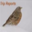

========= Most Similar Images with values =========


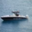

221870


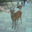

223161


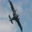

223915


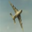

224888


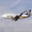

228624


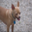

232782


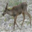

235859


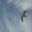

235944


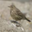

236544


In [7]:
print_manhattan(arr[1])

=================== Random Image ==================


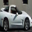

========= Most Similar Images with values =========


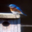

315859


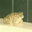

319364


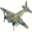

320158


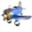

325307


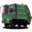

327024


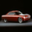

327728


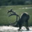

327956


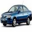

329769


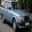

336015


In [8]:
print_manhattan(arr[2])

=================== Random Image ==================


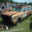

========= Most Similar Images with values =========


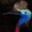

279705


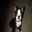

303105


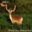

306344


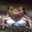

307727


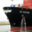

313013


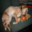

315673


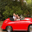

315956


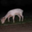

320846


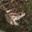

325257


In [9]:
print_manhattan(arr[3])

=================== Random Image ==================


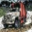

========= Most Similar Images with values =========


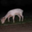

282070


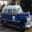

300363


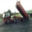

308022


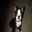

308873


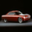

311649


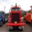

312101


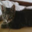

313629


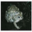

318349


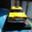

320446


In [10]:
print_manhattan(arr[4])

=================== Random Image ==================


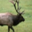

========= Most Similar Images with values =========


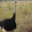

263346


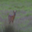

267271


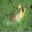

268630


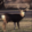

272609


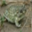

274385


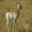

276099


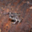

276786


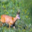

282932


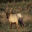

284974


In [11]:
print_manhattan(arr[5])

=================== Random Image ==================


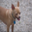

========= Most Similar Images with values =========


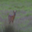

245801


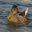

251514


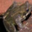

252976


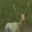

254030


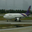

254974


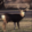

257283


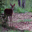

257852


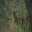

262827


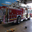

264314


In [12]:
print_manhattan(arr[6])

=================== Random Image ==================


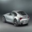

========= Most Similar Images with values =========


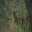

241581


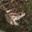

259579


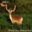

260378


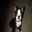

262259


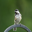

269650


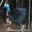

270417


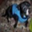

271796


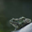

271826


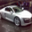

273020


In [13]:
print_manhattan(arr[7])

=================== Random Image ==================


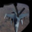

========= Most Similar Images with values =========


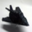

243180


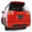

269685


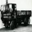

272689


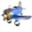

278272


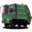

282293


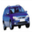

284043


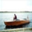

293175


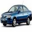

297838


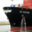

299601


In [14]:
print_manhattan(arr[8])

=================== Random Image ==================


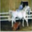

========= Most Similar Images with values =========


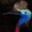

304066


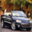

304143


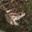

306098


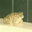

306774


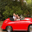

308061


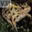

312454


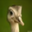

312666


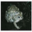

314414


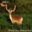

315345


In [15]:
print_manhattan(arr[9])

# Euclidean Distance

In [16]:
def print_euclidean(arr):
    images_matrix = np.array(arr)
    images_sort = images_matrix[images_matrix[:,2].argsort()]
    print("=================== Random Image ==================")
    cv2_imshow(images_sort[0][3])
    print("========= Most Similar Images with values =========")
    for i in range(1,10):
        view_image = images_sort[i][3]
        similarity = images_sort[i][2]
        cv2_imshow(view_image)
        print(similarity)

=================== Random Image ==================


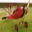

========= Most Similar Images with values =========


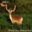

6790.376057332907


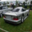

6900.538167418538


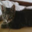

6944.727208465427


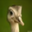

7015.065502188842


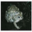

7049.847941622571


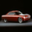

7190.2599396683845


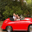

7200.865850715454


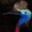

7284.998146876909


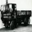

7343.797518995197


In [17]:
print_euclidean(arr[0])

=================== Random Image ==================


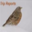

========= Most Similar Images with values =========


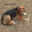

5155.7620193333205


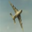

5408.446542215242


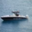

5444.790721414369


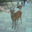

5514.030195782391


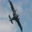

5534.212952173055


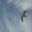

5556.283830043242


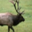

5568.321470604943


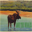

5585.034735791713


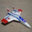

5591.279281166341


In [18]:
print_euclidean(arr[1])

=================== Random Image ==================


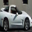

========= Most Similar Images with values =========


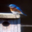

6838.203053434433


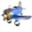

6870.541681701669


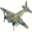

6920.349124141065


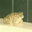

6956.62173759649


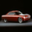

7057.424317695514


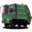

7079.670613806831


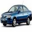

7144.505931133377


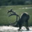

7155.29957444131


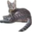

7206.837447868517


In [19]:
print_euclidean(arr[2])

=================== Random Image ==================


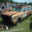

========= Most Similar Images with values =========


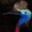

6244.838268522252


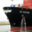

6737.838154779321


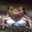

6889.613124116622


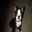

6902.59262886055


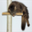

6962.830099894726


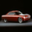

7013.8904325630865


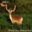

7030.642502645117


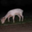

7043.513611827551


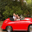

7057.950694075441


In [20]:
print_euclidean(arr[3])

=================== Random Image ==================


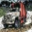

========= Most Similar Images with values =========


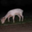

6353.436393008117


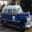

6737.350592035418


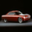

6740.710274147673


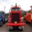

6891.869485125208


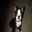

6918.614528935688


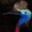

6937.120512143349


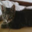

6941.596286157817


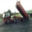

6945.012598980653


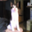

6961.716957762646


In [21]:
print_euclidean(arr[4])

=================== Random Image ==================


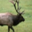

========= Most Similar Images with values =========


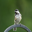

6023.225215779334


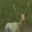

6133.608725701371


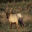

6143.09140417103


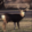

6217.35611011626


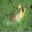

6240.704447416173


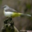

6263.376246083258


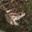

6285.587562034277


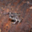

6330.536786086943


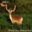

6395.055433692502


In [22]:
print_euclidean(arr[5])

=================== Random Image ==================


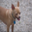

========= Most Similar Images with values =========


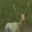

5554.461450041759


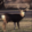

5697.236435325464


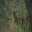

5707.689812875258


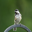

5802.292995014988


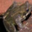

5869.797441138834


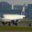

5886.920672134117


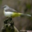

5912.664035779472


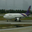

5937.3322292086705


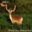

5994.595399190841


In [23]:
print_euclidean(arr[6])

=================== Random Image ==================


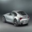

========= Most Similar Images with values =========


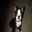

5659.130940347643


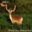

5922.497783874638


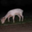

5998.43646294599


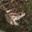

6090.037356207267


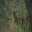

6119.7804699188355


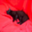

6122.831779495497


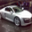

6231.627556264896


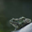

6253.4475291634135


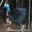

6257.6907082405405


In [24]:
print_euclidean(arr[7])

=================== Random Image ==================


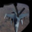

========= Most Similar Images with values =========


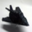

5614.326673787338


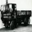

6284.214270694468


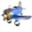

6310.662088877838


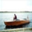

6340.180833383224


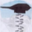

6378.963081880942


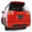

6438.077741065263


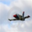

6462.1181511947


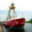

6649.718189517508


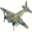

6696.1691286884325


In [25]:
print_euclidean(arr[8])

=================== Random Image ==================


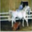

========= Most Similar Images with values =========


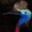

6550.4657849652185


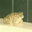

6642.757409389567


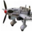

6696.952963848559


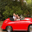

6711.655756964894


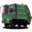

6824.752010146596


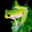

6925.41998726431


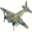

6948.651667769798


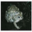

6967.284119368177


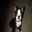

6977.794493964408


In [26]:
print_euclidean(arr[9])